In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [2]:
incomes = pd.read_csv(data_dir + 'census_data/DA_income.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')

In [18]:
clinics_gdf

,site,address,munic,geometry
0,AMS - Toronto - Danforth Avenue,"2688 Danforth Ave, Toronto, ON M4C 1L7, Canada",Toronto,POINT (-79.29884 43.68905)
1,Ontario Addiction Treatment Centres - North York,"1111 Finch Ave W, North York, ON M3J 2E5, Canada",North York,POINT (-79.47373 43.76628)
2,Queen Street Treatment Clinic,"1175 Queen St W, Toronto, ON M6J 1J6, Canada",Toronto,POINT (-79.42610 43.64257)
3,New Dawn Medical - Toronto - Davenport Road,"1892 Davenport Rd, Toronto, ON M6N 1B7, Canada",Toronto,POINT (-79.45436 43.67077)
4,TrueNorth Medical Centre - North York - Terrac...,"3424 Weston Rd, North York, ON M9M 2W1, Canada",North York,POINT (-79.54278 43.75056)
...,...,...,...,...
84,King Ray Pharmacy and Medical Clinic - Downtow...,"King Ray Pharmacy, 202 King St E, Oshawa, ON ...",None,POINT (-78.85629 43.89967)
85,Lakeridge Health - Oshawa - Pinewood Centre,"300 Centre St S, Oshawa, ON L1H 4B2",None,POINT (-78.86241 43.88884)
86,Oshawa Lakeview Pharmacy - Walk-In Clinic - Ad...,"799 Park Rd S, Unit 5, Oshawa, ON L1J 4K1\t",None,POINT (-78.86330 43.87419)
87,TrueNorth Medical Clinic - Oshawa - Taunton Ph...,"30 Taunton Rd E, Oshawa, ON L1G 3T7\t",None,POINT (-78.87786 43.93366)


In [3]:
travel_diff = travel_diff.merge(incomes, left_on='fromId', right_on='GeoUID', how='left')
travel_diff = travel_diff[['fromId', 'time', 'diff', 'tt_2019', 'tt_2020', 'neg_access', 'v_CA16_4986: Average after-tax income of households in 2015 ($)', 'Population', 'geometry']]
travel_diff.rename(columns={'v_CA16_4986: Average after-tax income of households in 2015 ($)': 'average_income'}, inplace=True)

travel_diff['income_quintile'] = pd.qcut(travel_diff['average_income'].values, 5, labels =np.arange(0, 5, 1))

In [4]:
times = ['0800', '1100', '1500', '0900_sat']
travel_diff_dic = {}
low_income_dic = {}
for time in times:
    travel_diff_dic[time] = travel_diff[travel_diff['time']==time]
    low_income_dic[time] = travel_diff_dic[time][(travel_diff_dic[time]['neg_access']==1) & (travel_diff_dic[time]['income_quintile']==0)]

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


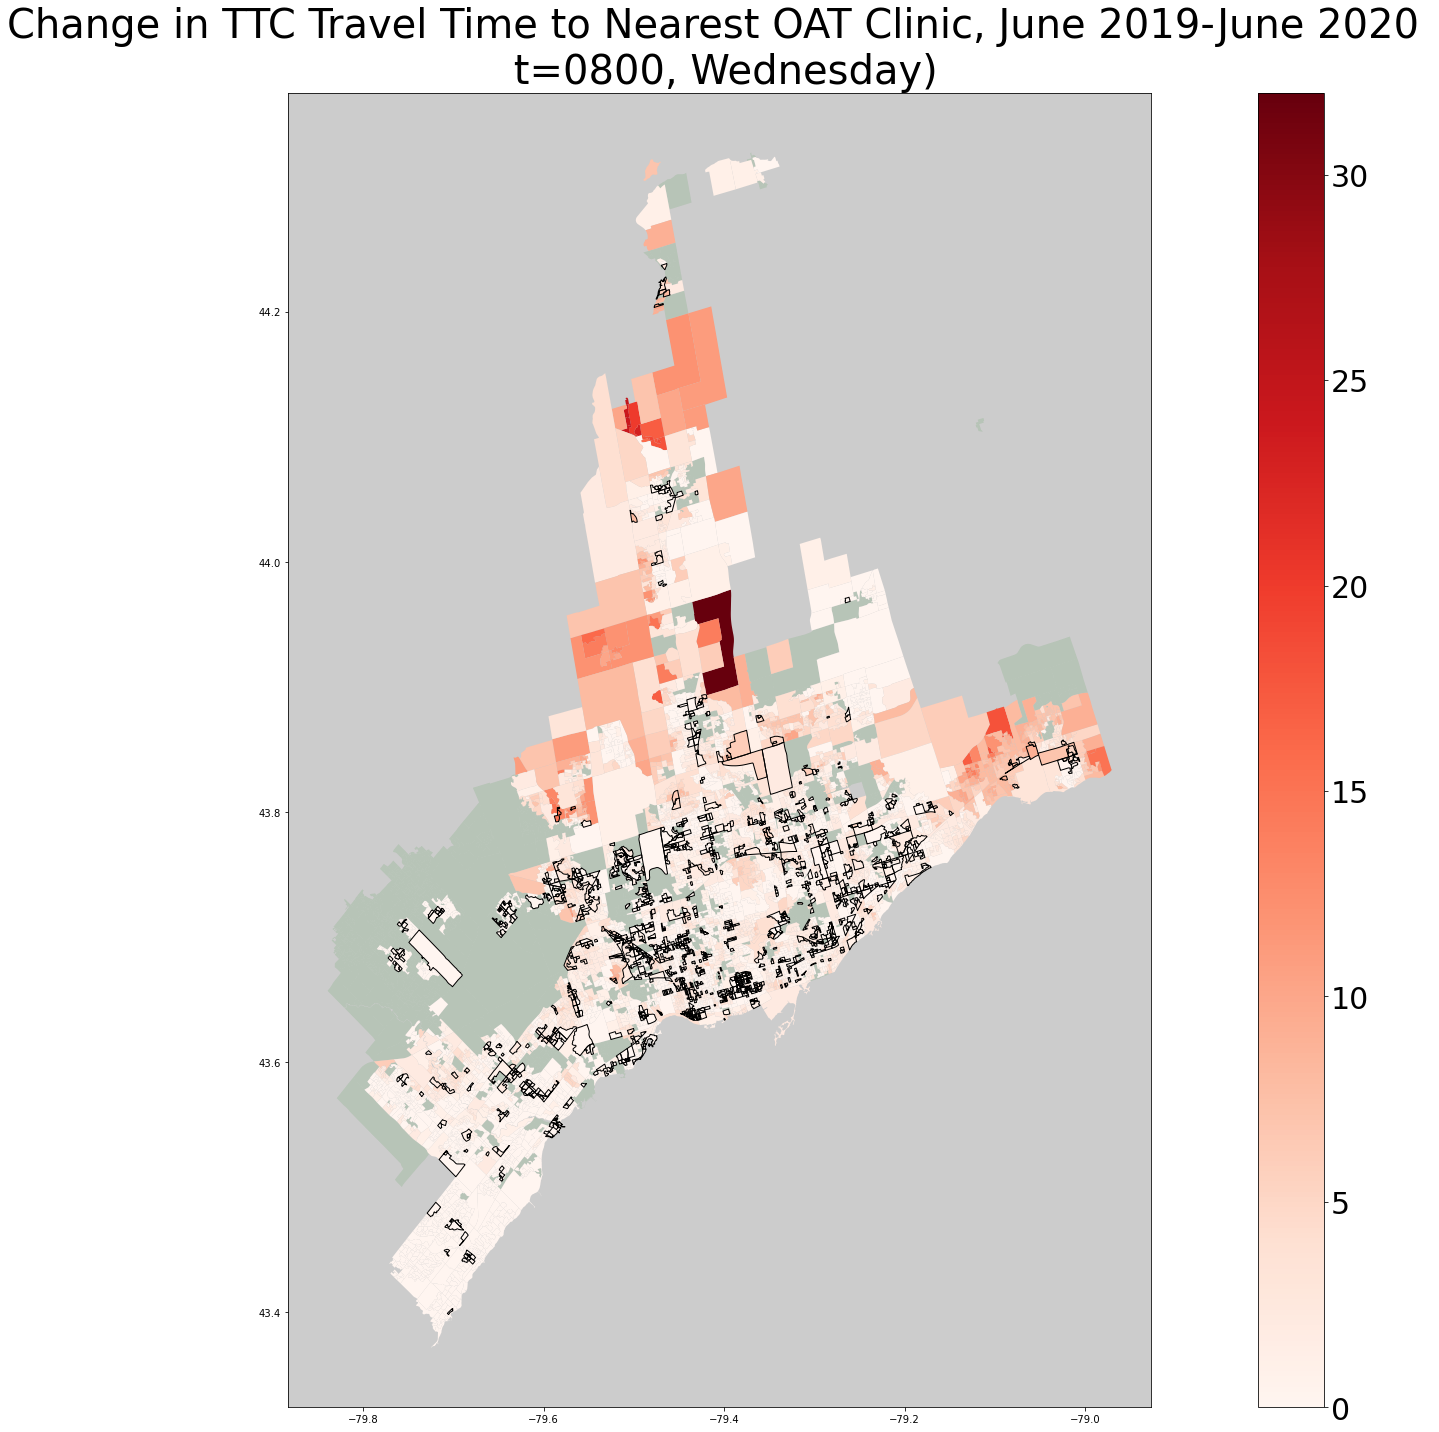

In [5]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


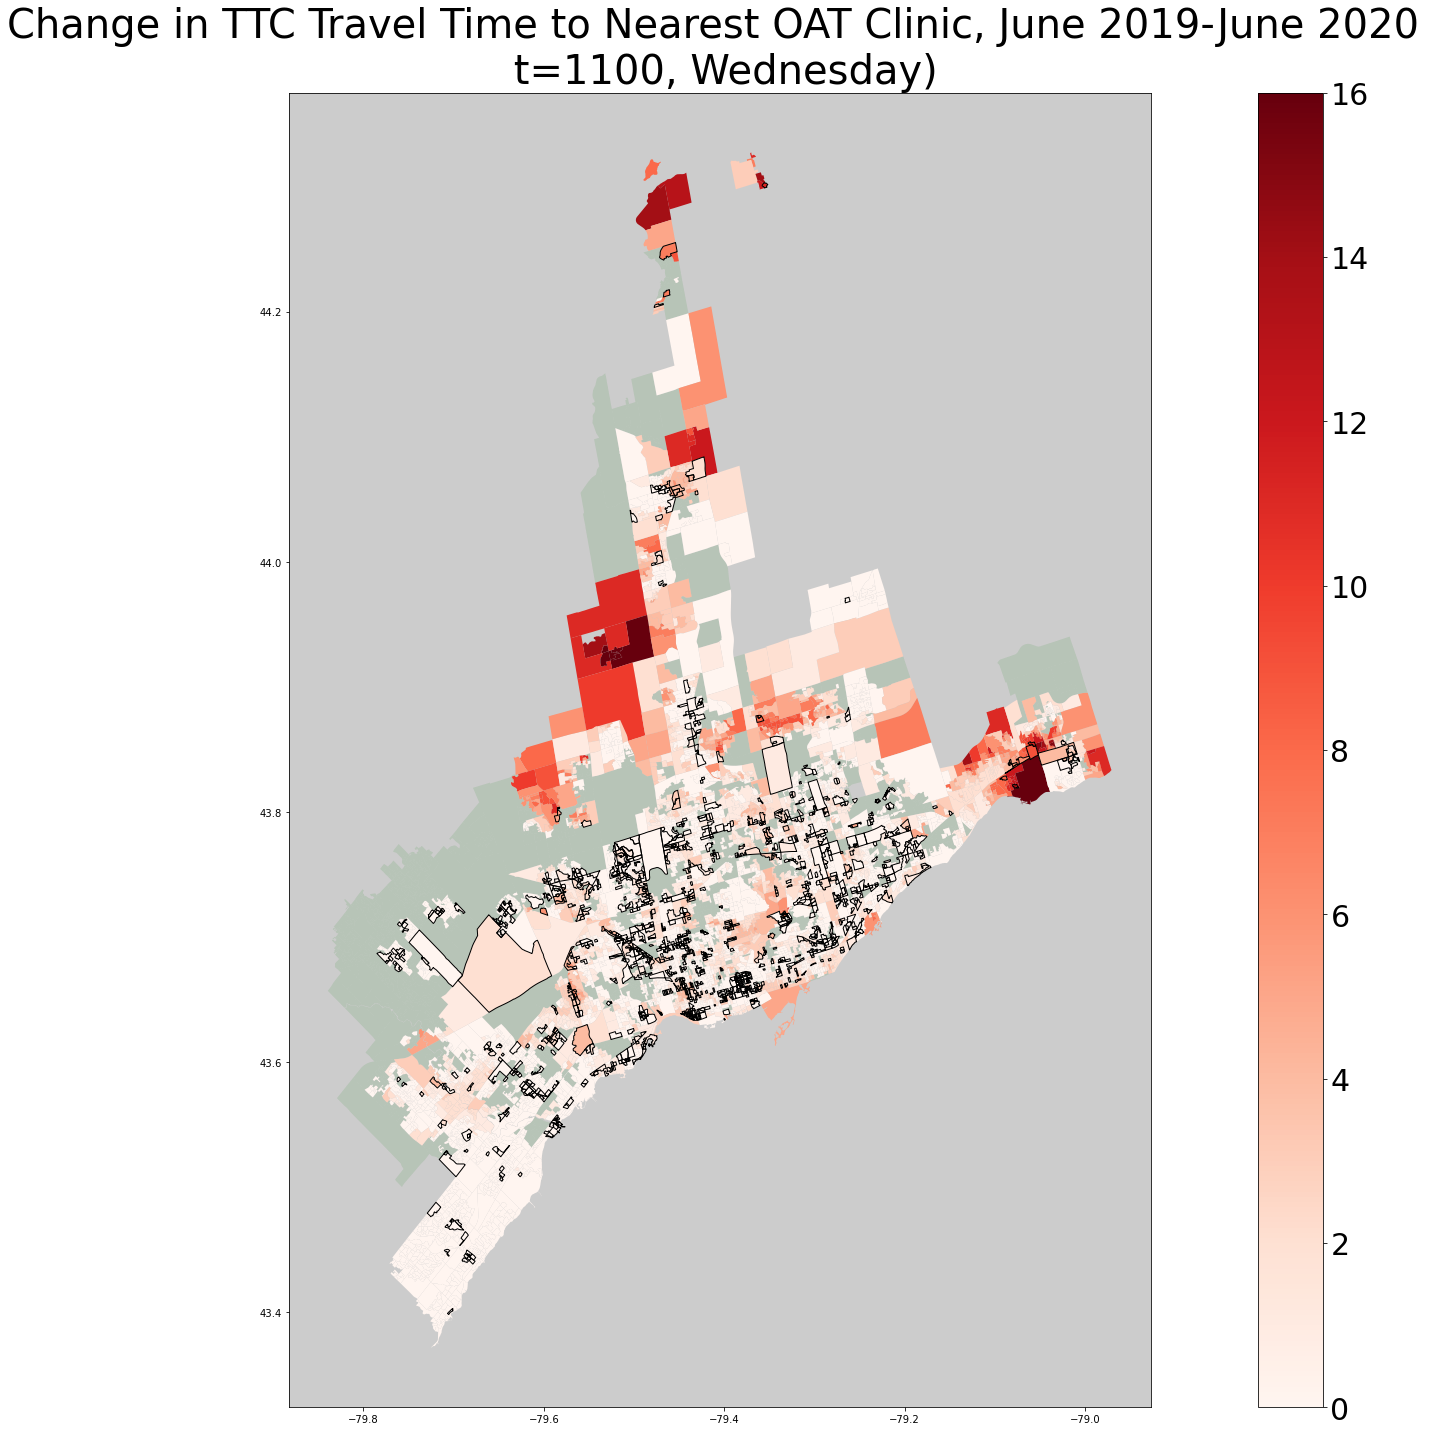

In [6]:
time = '1100'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


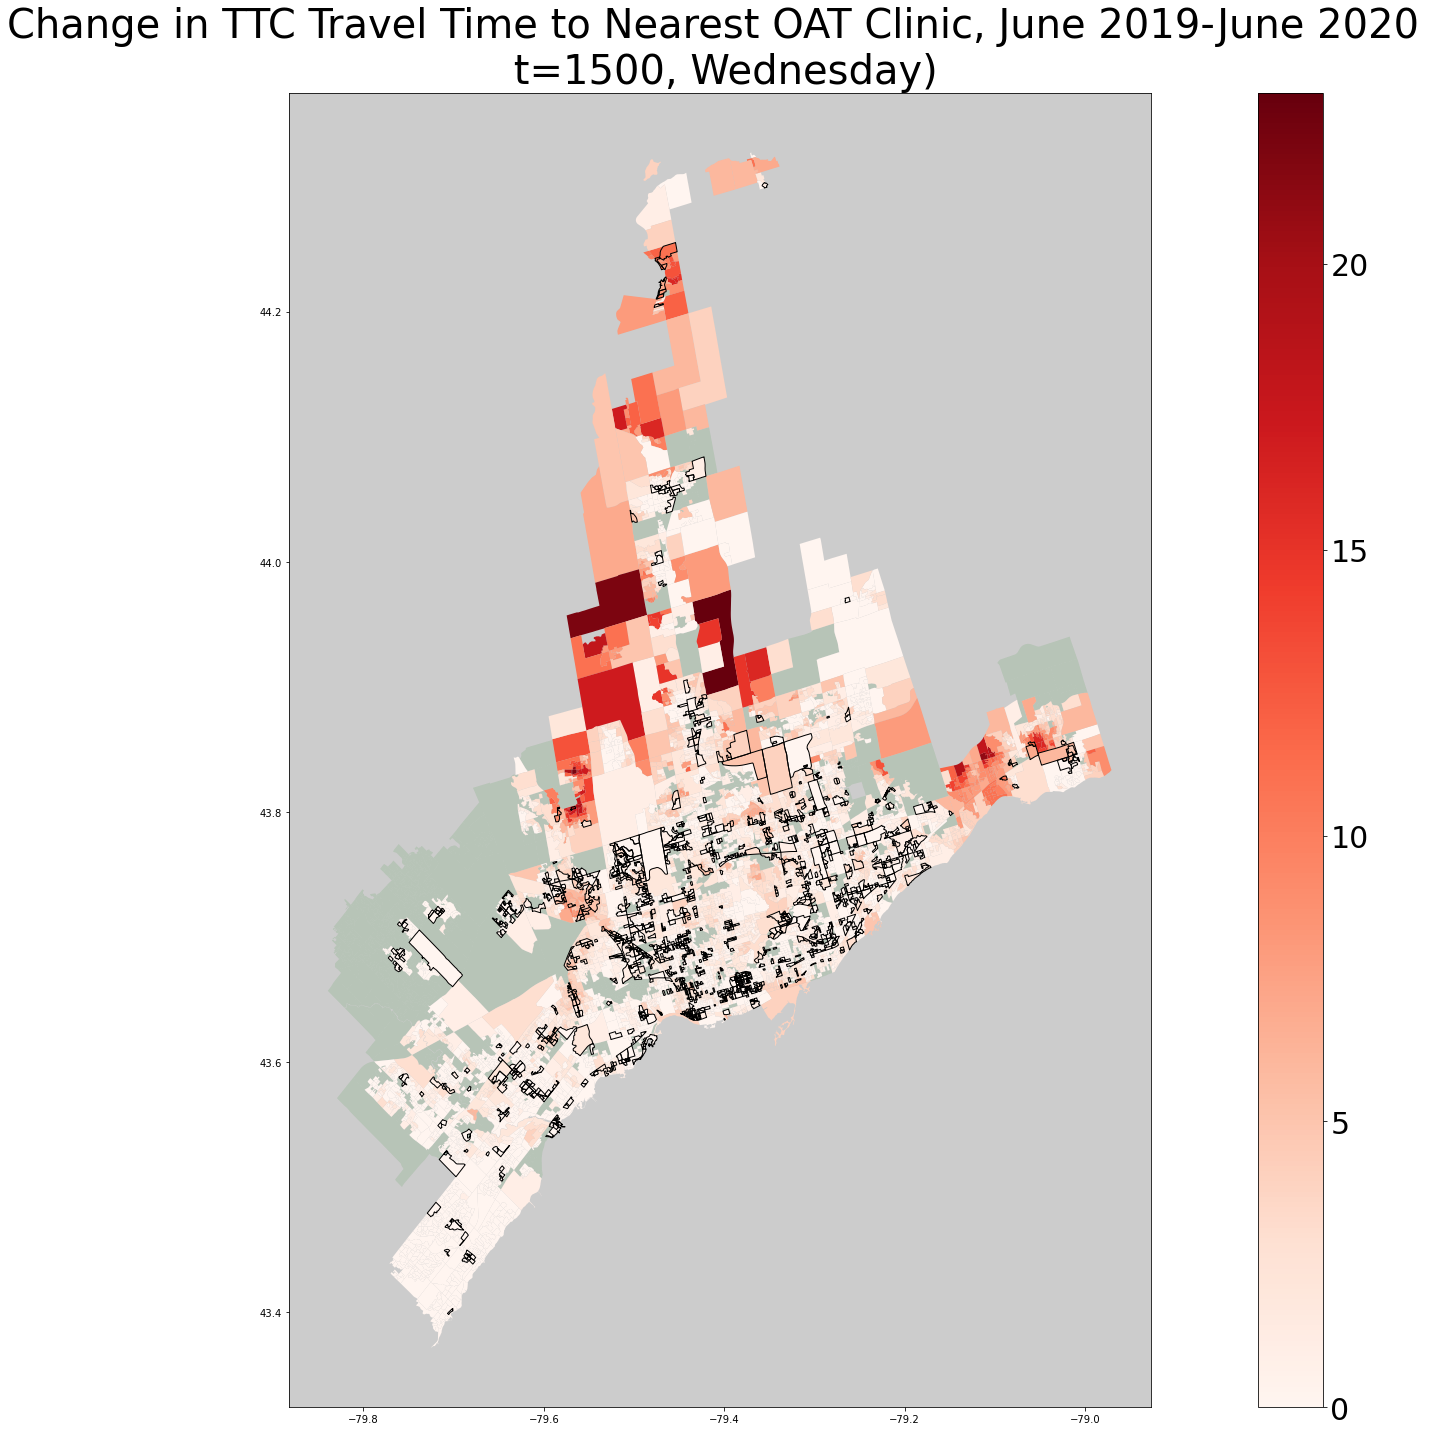

In [8]:
time = '1500'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


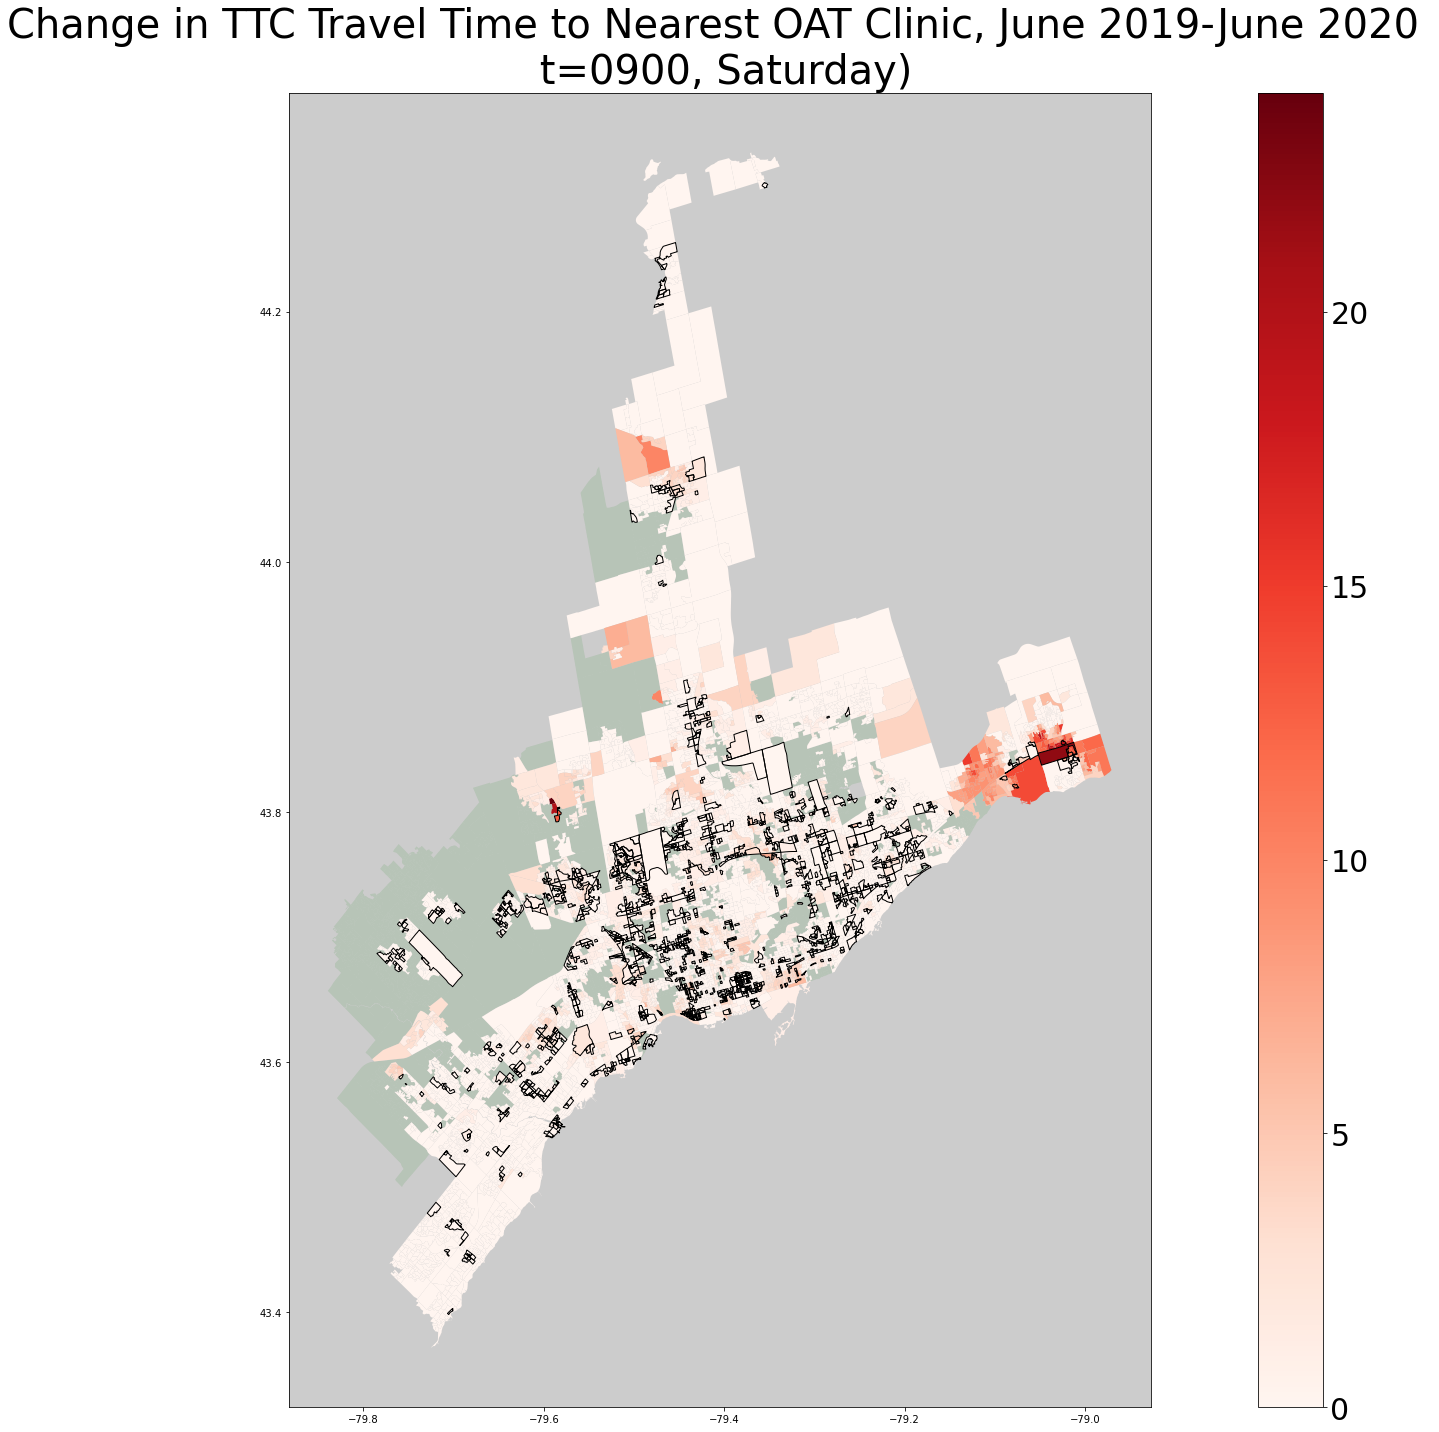

In [9]:
time = '0900_sat'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t=0900, Saturday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

## Look at Distribution of Travel Times and Travel Changes across Income Groups

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_palette("pastel")


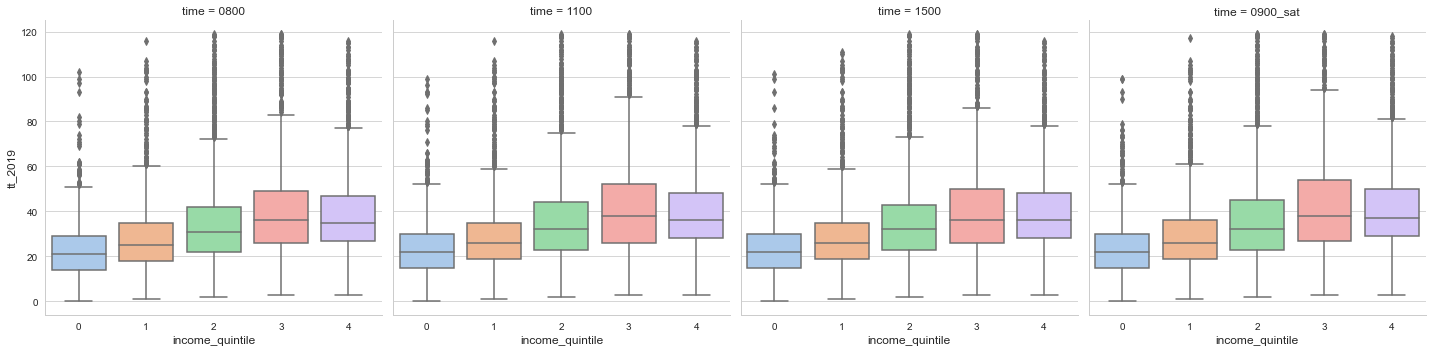

In [11]:
sns.catplot(data=travel_diff, x='income_quintile', y='tt_2019', col='time', kind='box')
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/distributions/abs_2019.png')

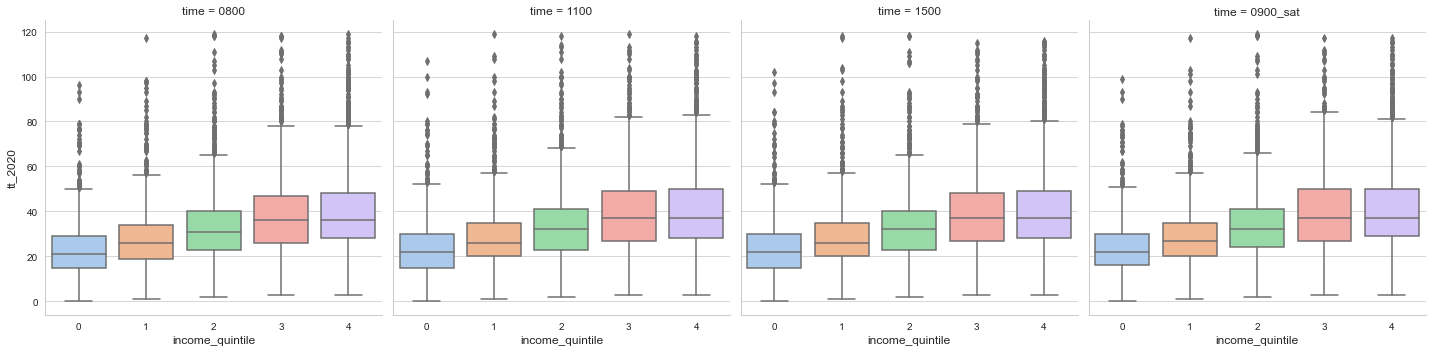

In [12]:
sns.catplot(data=travel_diff, x='income_quintile', y='tt_2020', col='time', kind='box')
plt.tight_layout()

#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/distributions/abs_2020.png')

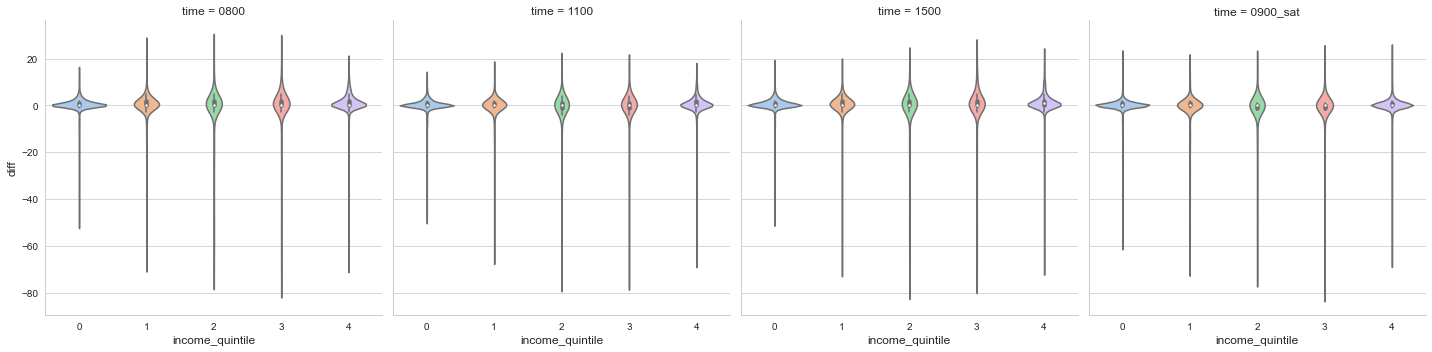

In [13]:
sns.catplot(data=travel_diff, x='income_quintile', y='diff', col='time', kind='violin')
plt.tight_layout()

#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/distributions/difference_violin.png')

In [14]:
travel_diff.groupby(['time', 'income_quintile'])['tt_2019'].describe()

count       mean        std  min   25%   50%   75%  \
time     income_quintile                                                        
0800     0                1332.0  22.724474  12.105220  0.0  14.0  21.0  29.0   
         1                1332.0  28.665165  16.447733  1.0  18.0  25.0  35.0   
         2                1334.0  36.437031  22.169405  2.0  22.0  31.0  42.0   
         3                1336.0  40.359281  22.096139  3.0  26.0  36.0  49.0   
         4                1333.0  39.672918  19.779213  3.0  27.0  35.0  47.0   
0900_sat 0                1331.0  23.793388  12.685146  0.0  15.0  22.0  30.0   
         1                1330.0  29.865414  16.682421  1.0  19.0  26.0  36.0   
         2                1325.0  38.014340  22.329460  2.0  23.0  32.0  45.0   
         3                1323.0  42.758125  22.299783  3.0  27.0  38.0  54.0   
         4                1329.0  41.970655  20.265739  3.0  29.0  37.0  50.0   
1100     0                1332.0  23.569069  12.587385  0.0  15.0  22.0  30.0   
         1                1331.0  29.591285  16.565606  1.0  19.0  26.0  35.0   
         2                1332.0  37.797297  22.400616  2.0  23.0  32.0  44.0   
         3                1332.0  42.034535  22.373820  3.0  26.0  38.0  52.0   
         4                1332.0  40.891141  20.007272  3.0  28.0  36.0  48.0   
1500     0                1332.0  23.448949  12.257675  0.0  15.0  22.0  30.0   
         1                1332.0  29.403153  16.520245  1.0  19.0  26.0  35.0   
         2                1334.0  37.044228  21.869530  2.0  23.0  32.0  43.0   
         3                1333.0  40.864966  21.675842  3.0  26.0  36.0  50.0   
         4                1332.0  40.319069  19.598590  3.0  28.0  36.0  48.0   

                            max  
time     income_quintile         
0800     0                102.0  
         1                116.0  
         2                119.0  
         3                119.0  
         4                116.0  
0900_sat 0                 99.0  
         1                117.0  
         2                119.0  
         3                119.0  
         4                118.0  
1100     0                 99.0  
         1                116.0  
         2                119.0  
         3                119.0  
         4                116.0  
1500     0                101.0  
         1                111.0  
         2                119.0  
         3                119.0  
         4                116.0

In [16]:
travel_diff.groupby(['time', 'income_quintile'])['tt_2020'].describe()

count       mean        std  min   25%   50%   75%  \
time     income_quintile                                                        
0800     0                1332.0  23.061562  12.017735  0.0  15.0  21.0  29.0   
         1                1332.0  27.658408  13.586398  1.0  19.0  26.0  34.0   
         2                1334.0  33.041229  15.592060  2.0  23.0  31.0  40.0   
         3                1336.0  38.450599  17.929089  3.0  26.0  36.0  47.0   
         4                1333.0  40.843211  19.922828  3.0  28.0  36.0  48.0   
0900_sat 0                1331.0  23.815177  12.200226  0.0  16.0  22.0  30.0   
         1                1330.0  28.507519  13.708302  1.0  20.0  27.0  35.0   
         2                1325.0  33.889057  15.567286  2.0  24.0  32.0  41.0   
         3                1323.0  39.842782  18.023545  3.0  27.0  37.0  50.0   
         4                1329.0  42.112114  19.917304  3.0  29.0  37.0  50.0   
1100     0                1332.0  23.743994  12.367820  0.0  15.0  22.0  30.0   
         1                1331.0  28.314050  13.699754  1.0  20.0  26.0  35.0   
         2                1332.0  33.897147  15.939944  2.0  23.0  32.0  41.0   
         3                1332.0  39.507508  18.208636  3.0  27.0  37.0  49.0   
         4                1332.0  41.479730  19.973056  3.0  28.0  37.0  50.0   
1500     0                1332.0  23.918168  12.429760  0.0  15.0  22.0  30.0   
         1                1332.0  28.397147  13.873392  1.0  20.0  26.0  35.0   
         2                1334.0  33.597451  15.634057  2.0  23.0  32.0  40.0   
         3                1333.0  39.091523  18.004938  3.0  27.0  37.0  48.0   
         4                1332.0  41.559309  19.893033  3.0  28.0  37.0  49.0   

                            max  
time     income_quintile         
0800     0                 96.0  
         1                117.0  
         2                119.0  
         3                118.0  
         4                119.0  
0900_sat 0                 99.0  
         1                117.0  
         2                119.0  
         3                117.0  
         4                117.0  
1100     0                107.0  
         1                119.0  
         2                118.0  
         3                119.0  
         4                118.0  
1500     0                102.0  
         1                118.0  
         2                118.0  
         3                115.0  
         4                116.0

In [17]:
travel_diff.groupby(['time', 'income_quintile'])['diff'].describe()

count      mean        std   min  25%  50%  75%  \
time     income_quintile                                                     
0800     0                1332.0  0.337087   3.050988 -51.0  0.0  0.0  1.0   
         1                1332.0 -1.006757   8.521989 -67.0  0.0  0.0  2.0   
         2                1334.0 -3.395802  13.962897 -72.0  0.0  0.0  2.0   
         3                1336.0 -1.908683  12.995731 -76.0  0.0  0.0  2.0   
         4                1333.0  1.170293   4.898853 -69.0  0.0  0.0  2.0   
0900_sat 0                1331.0  0.021788   3.252572 -60.0  0.0  0.0  1.0   
         1                1330.0 -1.357895   8.122169 -69.0  0.0  0.0  1.0   
         2                1325.0 -4.125283  13.561909 -71.0 -1.0  0.0  0.0   
         3                1323.0 -2.915344  12.184056 -78.0 -1.0  0.0  0.0   
         4                1329.0  0.141460   4.447434 -67.0  0.0  0.0  1.0   
1100     0                1332.0  0.174925   2.948881 -49.0  0.0  0.0  1.0   
         1                1331.0 -1.277235   8.086222 -64.0  0.0  0.0  1.0   
         2                1332.0 -3.900150  13.611706 -73.0 -1.0  0.0  1.0   
         3                1332.0 -2.527027  12.301253 -73.0 -1.0  0.0  1.0   
         4                1332.0  0.588589   4.604292 -67.0  0.0  0.0  2.0   
1500     0                1332.0  0.469219   3.048042 -50.0  0.0  0.0  1.0   
         1                1332.0 -1.006006   8.586150 -69.0  0.0  0.0  2.0   
         2                1334.0 -3.446777  14.311499 -76.0  0.0  0.0  2.0   
         3                1333.0 -1.773443  13.184803 -74.0  0.0  0.0  2.0   
         4                1332.0  1.240240   5.085824 -70.0  0.0  1.0  2.0   

                           max  
time     income_quintile        
0800     0                15.0  
         1                25.0  
         2                24.0  
         3                24.0  
         4                19.0  
0900_sat 0                22.0  
         1                18.0  
         2                17.0  
         3                20.0  
         4                24.0  
1100     0                13.0  
         1                15.0  
         2                16.0  
         3                16.0  
         4                16.0  
1500     0                18.0  
         1                16.0  
         2                18.0  
         3                22.0  
         4                22.0